In [1]:
#로이터 데이터셋 로드
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

In [2]:
#로이터 데이터 셋을 텍스트로 디코딩하기.
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
# 0,1,2는 각각 패딩, 문서시작, 사전에 없음을 위해 예약되어있음.
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [3]:
#데이터 인코딩(X)
import numpy as np
def vertorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i ,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vertorize_sequences(train_data)
x_test = vertorize_sequences(test_data)

In [4]:
#데이터 인코딩(Y)
'''
def to_one_hot(labels, dimension = 46):
	results = np.zeros((len(labels), dimension))
	for i ,labels in enumerate(labels):
    	results[i,labels] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
'''
#위 함수를 케라스 내장 함수에서 제공함.
# 원핫 인코딩
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [5]:
#처음 진행하기 위한 코드
#모델 정의 하기
model = keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])
#모델 컴파일 하기
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#모델 훈련하기
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.3261 - accuracy: 0.5246 - val_loss: 1.5346 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.2880 - accuracy: 0.7175 - val_loss: 1.2143 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9675 - accuracy: 0.7907 - val_loss: 1.0353 - val_accuracy: 0.7720
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.7523 - accuracy: 0.8325 - val_loss: 0.9540 - val_accuracy: 0.7960
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5855 - accuracy: 0.8738 - val_loss: 0.9026 - val_accuracy: 0.8190
Epoch 6/20
16/16 [==============================] - 1s 31ms/step - loss: 0.4704 - accuracy: 0.9025 - val_loss: 0.9169 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.3683 - accuracy: 0.9196 - val_loss: 0.8517 - val_accuracy: 0.8180
Epoch 8/20
16

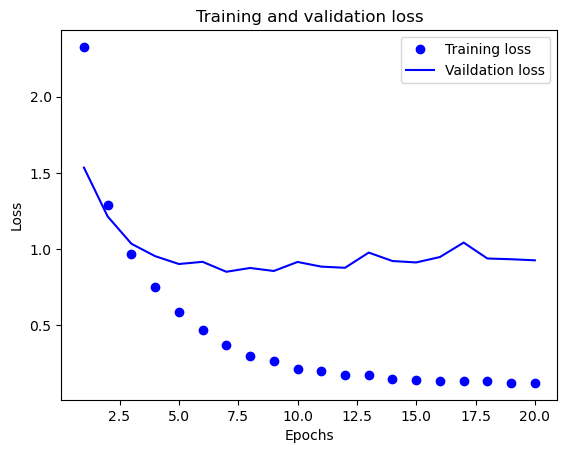

In [6]:
#훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss  = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Vaildation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

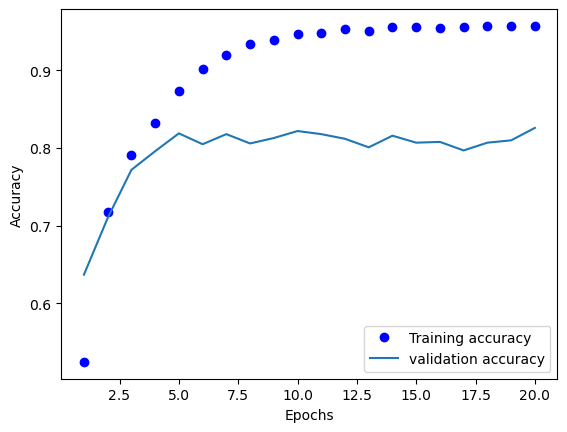

In [7]:
#훈련과 검증 손실 그리기
plt.clf() # 그래프 초기화
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
#과대 적합 확인하고 나서 재 훈련, 이후 결과 확인

model = keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(46, activation = "softmax"),
])
#재 훈련
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 9, batch_size = 512, validation_data=(x_val,y_val))

#결과 확인
result = model.evaluate(x_test, y_test)
print(result)

Epoch 1/9
18/18 [==============================] - 1s 44ms/step - loss: 2.2932 - accuracy: 0.5215 - val_loss: 1.3916 - val_accuracy: 0.6860
Epoch 2/9
18/18 [==============================] - 1s 34ms/step - loss: 1.2505 - accuracy: 0.7256 - val_loss: 0.9752 - val_accuracy: 0.7870
Epoch 3/9
18/18 [==============================] - 1s 30ms/step - loss: 0.9464 - accuracy: 0.7950 - val_loss: 0.7439 - val_accuracy: 0.8450
Epoch 4/9
18/18 [==============================] - 1s 31ms/step - loss: 0.7233 - accuracy: 0.8437 - val_loss: 0.5322 - val_accuracy: 0.8850
Epoch 5/9
18/18 [==============================] - 1s 32ms/step - loss: 0.5617 - accuracy: 0.8801 - val_loss: 0.4084 - val_accuracy: 0.9140
Epoch 6/9
18/18 [==============================] - 1s 31ms/step - loss: 0.4440 - accuracy: 0.9031 - val_loss: 0.3120 - val_accuracy: 0.9470
Epoch 7/9
18/18 [==============================] - 1s 32ms/step - loss: 0.3518 - accuracy: 0.9252 - val_loss: 0.3052 - val_accuracy: 0.9440
Epoch 8/9
18/18 [===